
# "Phenotypic Ages" in NHANES Data

This example loads blood exam data from NHANES 2010, calculates "Phenotypic Ages," and performs survival analyses by phenotypic age. 


## Loading NHANES 2010 data



In [1]:
# Install required packages
%pip install --upgrade pip
%pip install biolearn seaborn pandas

In [ ]:
# Import required libraries
import seaborn as sn
import pandas as pd
from biolearn.load import load_nhanes
from biolearn.hematology import phenotypic_age
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [2]:
year = 2010
df = load_nhanes(year)
df["years_until_death"] = df["months_until_death"] / 12

## Calculate "biological age" based on PhenotypicAge



In [3]:
df["phenotypic_age"]=phenotypic_age(df)

## Show relation between biological age and chronological age



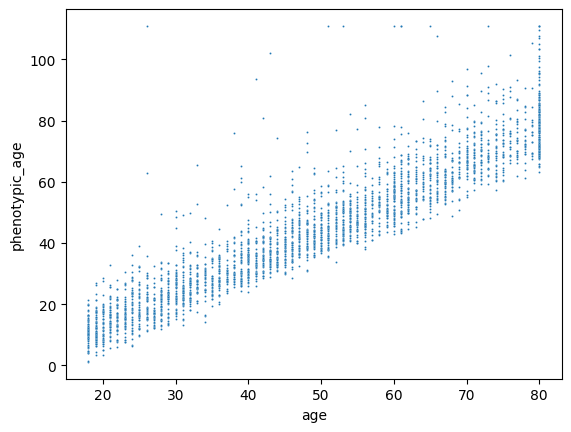

In [4]:
sn.scatterplot(data=df,x="age", y="phenotypic_age",s=2);

## Plot survival curve for people with accelerated aging (older biological age) vs decelerated aging (younger biological age)



Text(0.5, 0, 'Years')

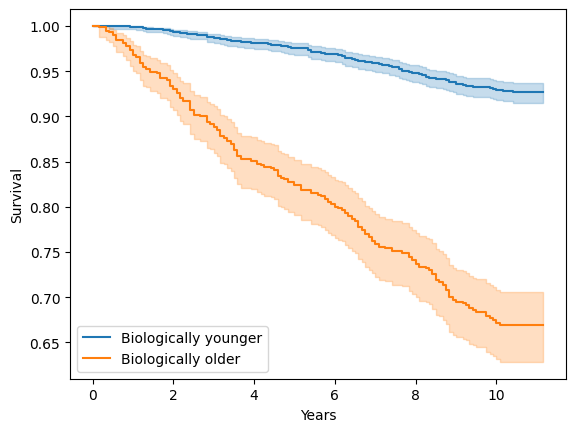

In [6]:
# Creating a new column to identify individuals with accelerated aging
df["biologically_older"] = df["phenotypic_age"] > df["age"]

# Creating a subplot for the survival curves
ax = plt.subplot()

groups = df["biologically_older"]  # Defining the groups for the survival analysis

# Identifying the individuals with decelerated aging
ix = groups == 0

# Defining the time variable for the survival analysis
T = df.years_until_death

# Defining the event variable for the survival analysis
E = df.is_dead

kmf = KaplanMeierFitter()

# Fitting the survival curve for the decelerated aging group
kmf.fit(T[ix], E[ix], label="Biologically younger")

# Plotting the survival curve for the decelerated aging group
ax = kmf.plot_survival_function(ax=ax)

# Fitting the survival curve for the accelerated aging group
# T is the time variable
# E is the event variable
kmf.fit(T[~ix], E[~ix], label="Biologically older")

# Plotting the survival curve for the accelerated aging group
ax = kmf.plot_survival_function()

# Setting the x and y labels
plt.ylabel("Survival")
plt.xlabel("Years")